In [1]:
from utils import plot_similarity_histogram, get_tanimoto_similarity_triangle, plot_histogram_with_two_y_axes, get_actives_inactives_similarity_flat, scaffold_dataset_splitter
import pandas as pd

2024-09-24 14:36:08.324774: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:36:08.412119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 14:36:08.412167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 14:36:08.414329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 14:36:08.427404: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:36:08.431157: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Dataset filtrado general

In [2]:
df = pd.read_pickle("../data/raw/data_chembl34_filtrada_02_09_24.pkl")

# Armado de dataset


In [3]:
target = "CHEMBL4072"
df_target = df[df.target == target]
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
204,161104,CHEMBL100095,10378,47423,CHEMBL4072,>,150000.0,nM,Ki,0,...,0.48,454.2468,C26H34N2O5,7.0,2.0,0.0,-0.08,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,0
341,160208,CHEMBL100316,10378,47610,CHEMBL4072,=,150.0,nM,IC50,0,...,0.54,431.2130,C24H33NO4S,5.0,1.0,0.0,-0.21,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,1
428,159661,CHEMBL100428,10378,47423,CHEMBL4072,=,119000.0,nM,Ki,0,...,0.28,530.2781,C32H38N2O5,7.0,2.0,2.0,-0.13,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,0
469,159633,CHEMBL100482,10378,47423,CHEMBL4072,=,1950.0,nM,Ki,0,...,0.40,439.2471,C25H33N3O4,7.0,5.0,0.0,0.11,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,1
670,166370,CHEMBL100702,10378,47424,CHEMBL4072,=,6170.0,nM,Ki,0,...,0.43,513.2264,C30H31N3O5,8.0,2.0,1.0,-0.37,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284294,161137,CHEMBL98540,10378,47423,CHEMBL4072,=,270.0,nM,Ki,0,...,0.40,439.2471,C25H33N3O4,7.0,5.0,0.0,-0.05,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,1
1284458,159634,CHEMBL98766,10378,47423,CHEMBL4072,=,519000.0,nM,Ki,0,...,0.57,424.2362,C25H32N2O4,6.0,2.0,0.0,-0.05,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,0
1284498,160819,CHEMBL98832,10378,47610,CHEMBL4072,=,60.0,nM,IC50,0,...,0.43,415.2181,C24H33NO3S,4.0,1.0,0.0,0.43,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,1
1284923,159714,CHEMBL99288,10378,47423,CHEMBL4072,=,1140.0,nM,Ki,0,...,0.41,405.2264,C21H31N3O5,8.0,5.0,0.0,-0.19,MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHN...,Homo sapiens,1


In [4]:
df_target[df_target.duplicated(subset="comp_id")]

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity


# Estudio de diversidad quimica de compuestos

100%|██████████| 1544/1544 [00:21<00:00, 72.33it/s]


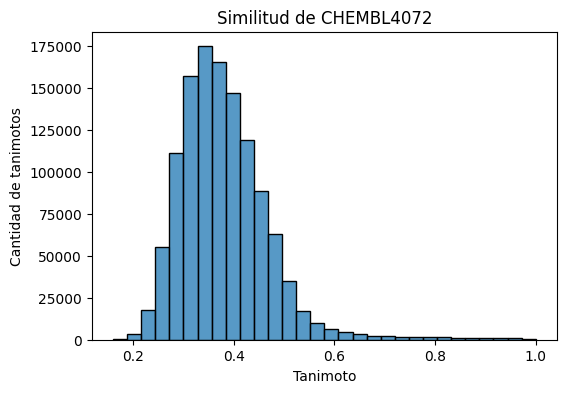

In [5]:
similarity_triangle = get_tanimoto_similarity_triangle(df_target)
plot_similarity_histogram(similarity_triangle,target)

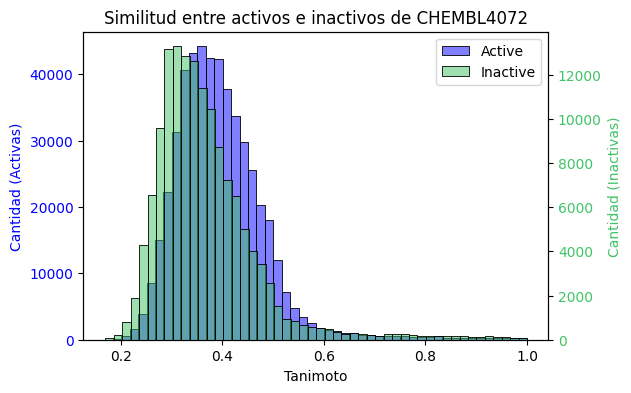

In [6]:
actives, inactives = get_actives_inactives_similarity_flat(df_target, similarity_triangle)

plot_histogram_with_two_y_axes(actives,inactives,target)

splitting

In [7]:
dataset_splited = scaffold_dataset_splitter(df_target)

dataset_splited.to_csv(f"../data/processed/{target}_chemblv34.csv",index=False)